In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [3]:
training_data= ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True,
                                 vertical_flip=True
                                 )

In [4]:
test_data= ImageDataGenerator(rescale=1./255)

In [5]:
train= training_data.flow_from_directory('dataset/training_set/',
                                        target_size=(64,64),
                                        batch_size=32,
                                        class_mode='binary')

Found 4000 images belonging to 2 classes.


In [6]:
test= test_data.flow_from_directory('dataset/test_set/',
                                    target_size=(64,64),
                                   batch_size=32,
                                   class_mode='binary')

Found 2000 images belonging to 2 classes.


In [7]:
cnn= tf.keras.Sequential([
    tf.keras.layers.Conv2D(30,activation='relu',input_shape=(64,64,3),strides=(2,2),kernel_size=3),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(60,activation='relu',kernel_size=3),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(90,activation='relu',kernel_size=3),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [8]:
opti= 'adam'
loss= 'binary_crossentropy'
metrics= ['accuracy']
epoch=25
batch_size=32

In [9]:
cnn.compile(optimizer=opti,loss=loss,metrics=metrics)

In [11]:
h= cnn.fit(train,validation_data=test,epochs=epoch,batch_size=batch_size)

Epoch 1/25
125/125 [==============================] - 106s 852ms/step - loss: 0.6707 - accuracy: 0.5918 - val_loss: 0.6792 - val_accuracy: 0.5675
Epoch 2/25
125/125 [==============================] - 32s 258ms/step - loss: 0.6574 - accuracy: 0.6137 - val_loss: 0.6668 - val_accuracy: 0.5930
Epoch 3/25
125/125 [==============================] - 32s 256ms/step - loss: 0.6506 - accuracy: 0.6220 - val_loss: 0.6495 - val_accuracy: 0.6185
Epoch 4/25
125/125 [==============================] - 32s 255ms/step - loss: 0.6310 - accuracy: 0.6497 - val_loss: 0.6341 - val_accuracy: 0.6390
Epoch 5/25
125/125 [==============================] - 32s 257ms/step - loss: 0.6252 - accuracy: 0.6535 - val_loss: 0.6124 - val_accuracy: 0.6725
Epoch 6/25
125/125 [==============================] - 32s 258ms/step - loss: 0.6007 - accuracy: 0.6808 - val_loss: 0.6635 - val_accuracy: 0.5930
Epoch 7/25
125/125 [==============================] - 32s 256ms/step - loss: 0.5981 - accuracy: 0.6835 - val_loss: 0.6133 - val_a

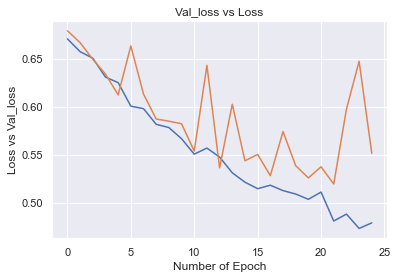

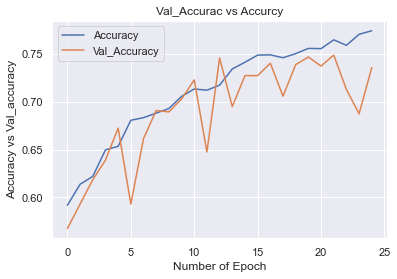

In [17]:
N= np.arange(0,epoch)
accuracy= h.history['accuracy']
loss= h.history['loss']
val_acc= h.history['val_accuracy']
val_loss= h.history['val_loss']


plt.figure()
plt.plot(N,loss,label= 'Loss')
plt.plot(N,val_loss,label='Val_loss')
plt.title('Val_loss vs Loss')
plt.xlabel('Number of Epoch')
plt.ylabel('Loss vs Val_loss')

plt.figure()
plt.plot(N,accuracy,label= 'Accuracy')
plt.plot(N,val_acc,label='Val_Accuracy')
plt.title('Val_Accurac vs Accurcy')
plt.xlabel('Number of Epoch')
plt.ylabel('Accuracy vs Val_accuracy')
plt.legend();